In [1]:
import os
import ast
import pytz
import json
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import pandas_profiling

In [2]:
def import_data(filename):
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    name,ext = os.path.splitext(filename)
    if ext == '.csv':
        data = pd.read_csv(filename,low_memory=False,parse_dates= True,infer_datetime_format = True,date_parser = dateparse)
    if ext == '.json':
        data = pd.read_json(filename)
    if ext =='.xlsx' or ext == '.xls':
        data == pd.read_excel(filename)
    return data

In [3]:
train = import_data("/home/divyanka/Downloads/train_s3TEQDk.csv")

In [4]:
test  = import_data("/home/divyanka/Downloads/test_mSzZ8RL.csv")

In [5]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [6]:
train['Credit_Product']=train['Credit_Product'].astype(str)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         245725 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [7]:
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
 
train['Gender']= le.fit_transform(train['Gender'])
train['Occupation']= le.fit_transform(train['Occupation'])
train['Credit_Product']= le.fit_transform(train['Credit_Product'])
train['Vintage']= le.fit_transform(train['Vintage'])
train['Region_Code']= le.fit_transform(train['Region_Code'])
train['Channel_Code']= le.fit_transform(train['Channel_Code'])
train['Age']= le.fit_transform(train['Age'])
train['Is_Lead']= le.fit_transform(train['Is_Lead'])
train['Is_Active']= le.fit_transform(train['Is_Active'])
train['ID']= le.fit_transform(train['ID'])


In [8]:
target=train.iloc[:,10:]
input=train.iloc[:,0:10]
target,input

(        Is_Lead
 0             0
 1             0
 2             0
 3             0
 4             0
 ...         ...
 245720        0
 245721        0
 245722        0
 245723        0
 245724        0
 
 [245725 rows x 1 columns],
             ID  Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
 0       179194       0   50           18           1             2       18   
 1       131013       0    7           27           2             0       13   
 2       121520       0   33           18           3             2       10   
 3        57273       1   11           20           2             0        6   
 4       209602       0    7           32           2             0       14   
 ...        ...     ...  ...          ...         ...           ...      ...   
 245720   60529       1   28           34           3             2       51   
 245721  122463       1    4           18           2             0        5   
 245722  111270       0    3           31     

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
 
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
 
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
 
from sklearn import metrics

In [10]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")


In [11]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [12]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

0    187437
1     58288
Name: Is_Lead, dtype: int64


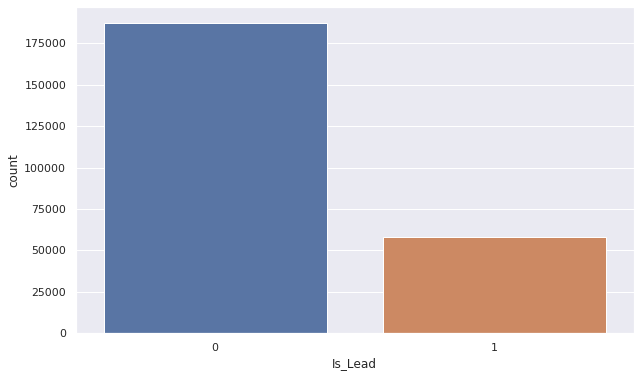

In [13]:
target = 'Is_Lead'
df1=train.copy()
X = df1.loc[:, df1.columns!=target]
Y = df1.loc[:, df1.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)
ax = sns.countplot(x=df1.Is_Lead, data=df1)
print(df1[target].value_counts())


In [14]:
import xgboost as xg
from xgboost import XGBClassifier
 
clf2 = xg.XGBClassifier(class_weight='balanced').fit(X_train, Y_train)

[22:54:38] WARNING: /tmp/pip-install-h266q8hf/xgboost/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:54:40] WARNING: /tmp/pip-install-h266q8hf/xgboost/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [15]:
from sklearn.utils import class_weight
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target])

array([0.65555069, 2.10719314])

In [16]:
Y_Test_Pred = clf2.predict(X_test)

In [17]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.8587988654581329
Precision =  0.7877396905308358
Recall =  0.5535036154606461
F1 Score =  0.6501680415520928


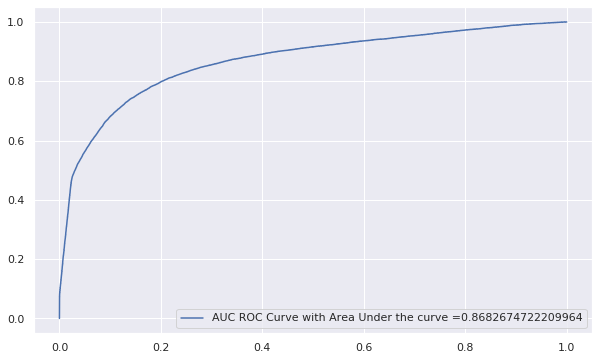

In [18]:
generate_auc_roc_curve(clf2, X_test)

In [19]:
test['Credit_Product']=test['Credit_Product'].astype(str)
df=test.copy()
lab=LabelEncoder()
df["Gender"]=lab.fit_transform(test["Gender"])
df["Occupation"]=lab.fit_transform(test["Occupation"])
df["Credit_Product"]=lab.fit_transform(test["Credit_Product"])
df["Is_Active"]=lab.fit_transform(test["Is_Active"])
df["Channel_Code"]=lab.fit_transform(test["Channel_Code"])
df["ID"]=lab.fit_transform(test["ID"])
df["Age"]=lab.fit_transform(test["Age"])
df["Region_Code"]=lab.fit_transform(test["Region_Code"])
df["Vintage"]=lab.fit_transform(test["Vintage"])
df["Avg_Account_Balance"]=lab.fit_transform(test["Avg_Account_Balance"])
df.head()
# target1=df.iloc[:,10:]
input1=df[0:]
input1

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,94233,1,5,4,1,0,9,1,27635,0
1,28747,1,19,18,1,1,21,2,37999,0
2,94883,1,7,20,2,0,4,0,732,0
3,90941,1,5,22,1,0,14,0,34903,0
4,87803,0,5,20,1,0,6,0,22312,0
5,73979,1,36,18,3,2,52,0,77336,0
6,100938,0,45,3,1,1,30,0,43336,0
7,4121,0,6,7,2,0,14,0,33249,0
8,95747,1,19,34,2,2,38,2,41856,1
9,17700,0,30,33,3,1,15,1,63256,0


In [21]:
predicted=clf2.predict(input1)
ff=pd.DataFrame({"ID":input1["ID"],
                 "Is_Lead"
                 :predicted})
#ff.to_csv ('dataframe.csv', index = None, header=True) 

In [22]:
ff.Is_Lead.value_counts()

0    84973
1    20339
Name: Is_Lead, dtype: int64

In [23]:
minority_class_len = len(train[train[target] == 1])
print(minority_class_len)

majority_class_indices = train[train[target] == 0].index
print(majority_class_indices)

58288
Int64Index([     0,      1,      2,      3,      4,      5,      7,      8,
                 9,     10,
            ...
            245715, 245716, 245717, 245718, 245719, 245720, 245721, 245722,
            245723, 245724],
           dtype='int64', length=187437)


In [24]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))
minority_class_indices = train[train[target] == 1].index
print(minority_class_indices)

58288
Int64Index([     6,     15,     16,     17,     20,     29,     31,     34,
                36,     37,
            ...
            245683, 245684, 245690, 245693, 245694, 245697, 245699, 245709,
            245713, 245714],
           dtype='int64', length=58288)


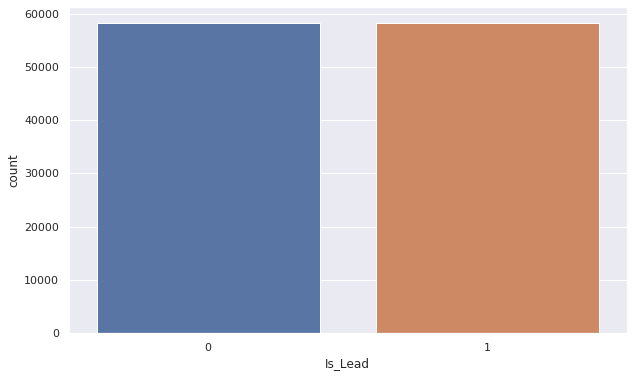

In [25]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
under_sample = train.loc[under_sample_indices]
sns.countplot(x=target, data=under_sample)

In [26]:
from sklearn.naive_bayes import GaussianNB 

X = under_sample.loc[:, train.columns!=target]
Y = under_sample.loc[:, train.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [31]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn import linear_model
from catboost import CatBoostRegressor

In [33]:
params = {'n_estimators':10000, 'learning_rate': 0.1, 'eval_metric':'RMSE', 'loss_function':'RMSE', 'random_state':42}
model = CatBoostRegressor(**params)
model.fit(X,Y,verbose=1000)
predictions_catboost = model.predict(input1)

0:	learn: 0.4803359	total: 165ms	remaining: 27m 28s
1000:	learn: 0.3611997	total: 1m 6s	remaining: 9m 56s
2000:	learn: 0.3515900	total: 2m 8s	remaining: 8m 35s
3000:	learn: 0.3434549	total: 3m 17s	remaining: 7m 40s
4000:	learn: 0.3362452	total: 4m 23s	remaining: 6m 35s
5000:	learn: 0.3299458	total: 5m 29s	remaining: 5m 28s
6000:	learn: 0.3241230	total: 6m 40s	remaining: 4m 26s
7000:	learn: 0.3186803	total: 7m 47s	remaining: 3m 20s
8000:	learn: 0.3136164	total: 8m 55s	remaining: 2m 13s
9000:	learn: 0.3089597	total: 10m 3s	remaining: 1m 6s
9999:	learn: 0.3044058	total: 11m 12s	remaining: 0us


In [35]:
predicted=model.predict(input1)
ff=pd.DataFrame({"ID":test["ID"],
                 "Is_Lead"
                 :predicted})

In [36]:
ff.Is_Lead.value_counts()

 0.116042    3
-0.205511    3
 0.307512    3
 0.005598    3
 0.024787    3
            ..
 0.056410    1
-0.250110    1
-0.031147    1
 0.445471    1
 0.684040    1
Name: Is_Lead, Length: 104769, dtype: int64

In [39]:
X = under_sample.loc[:, train.columns!=target]
Y = under_sample.loc[:, train.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = ExtraTreesClassifier().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [40]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.778924384601388
Precision =  0.813016588636495
Recall =  0.727451386015722
F1 Score =  0.7678576302644867


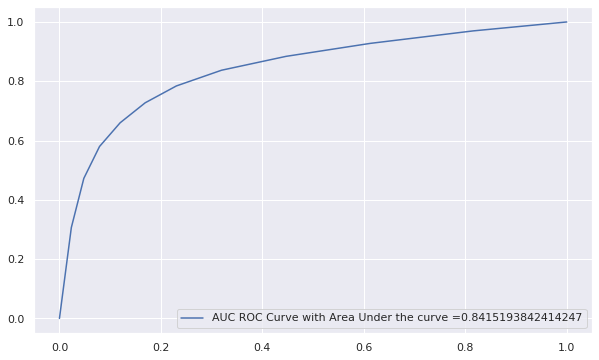

In [41]:
generate_auc_roc_curve(clf, X_test)

In [42]:
predicted=clf.predict(input1)
ff=pd.DataFrame({"ID":test["ID"],
                 "Is_Lead"
                 :predicted})


In [43]:
ff.Is_Lead.value_counts()

0    73729
1    31583
Name: Is_Lead, dtype: int64